<a href="https://colab.research.google.com/github/galav12/CSC442-Project/blob/main/Pratyush_Joshi_Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [170]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 65 (delta 27), reused 25 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 30.51 MiB | 33.34 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [171]:
%cd CSC442-Project/
!ls

/content/CSC442-Project/CSC442-Project/CSC442-Project/CSC442-Project/CSC442-Project
'CSC442 Dataset Report (1).pdf'   Pratyush_Joshi_Homework_6.ipynb
 data				  README.md
 dataset_cleaner.ipynb		  Tanmay_Kapse_Homework6.ipynb
'Homework 6 - GS.ipynb'		  teamnotes


## Cleaning Pollution Dataset

In [172]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [173]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [174]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [175]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [176]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [177]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

<ipython-input-177-1f9cd1d613a9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [178]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]
heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart = heart.drop(columns=["Age-Standardized"])
heart = heart.pivot_table(index=["Year","LocationDesc","Category","Topic"], columns=["Break_Out_Category", "Break_out"], values="Crude").reset_index()

heart.columns = (col[0]+'_'+col[1] if col[1] != '' else col[0] for col in heart.columns)

heart.shape

(2556, 19)

In [179]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2556 non-null   int64  
 1   LocationDesc             2556 non-null   object 
 2   Category                 2556 non-null   object 
 3   Topic                    2556 non-null   object 
 4   Age_18-24                846 non-null    float64
 5   Age_20-24                322 non-null    float64
 6   Age_25-44                2114 non-null   float64
 7   Age_35+                  2556 non-null   float64
 8   Age_45-64                2556 non-null   float64
 9   Age_65+                  2556 non-null   float64
 10  Age_75+                  2551 non-null   float64
 11  Gender_Female            2556 non-null   float64
 12  Gender_Male              2556 non-null   float64
 13  Overall_Overall          2556 non-null   float64
 14  Race_Hispanic           

In [180]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [181]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")


In [182]:
merged = merged[merged["State"].notna()]
merged = merged.drop(columns=["State"])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1841 entries, 22 to 2555
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic            130

In [183]:
# merged_data.to_csv("data/merged_data.csv",index=False)

## Outliers

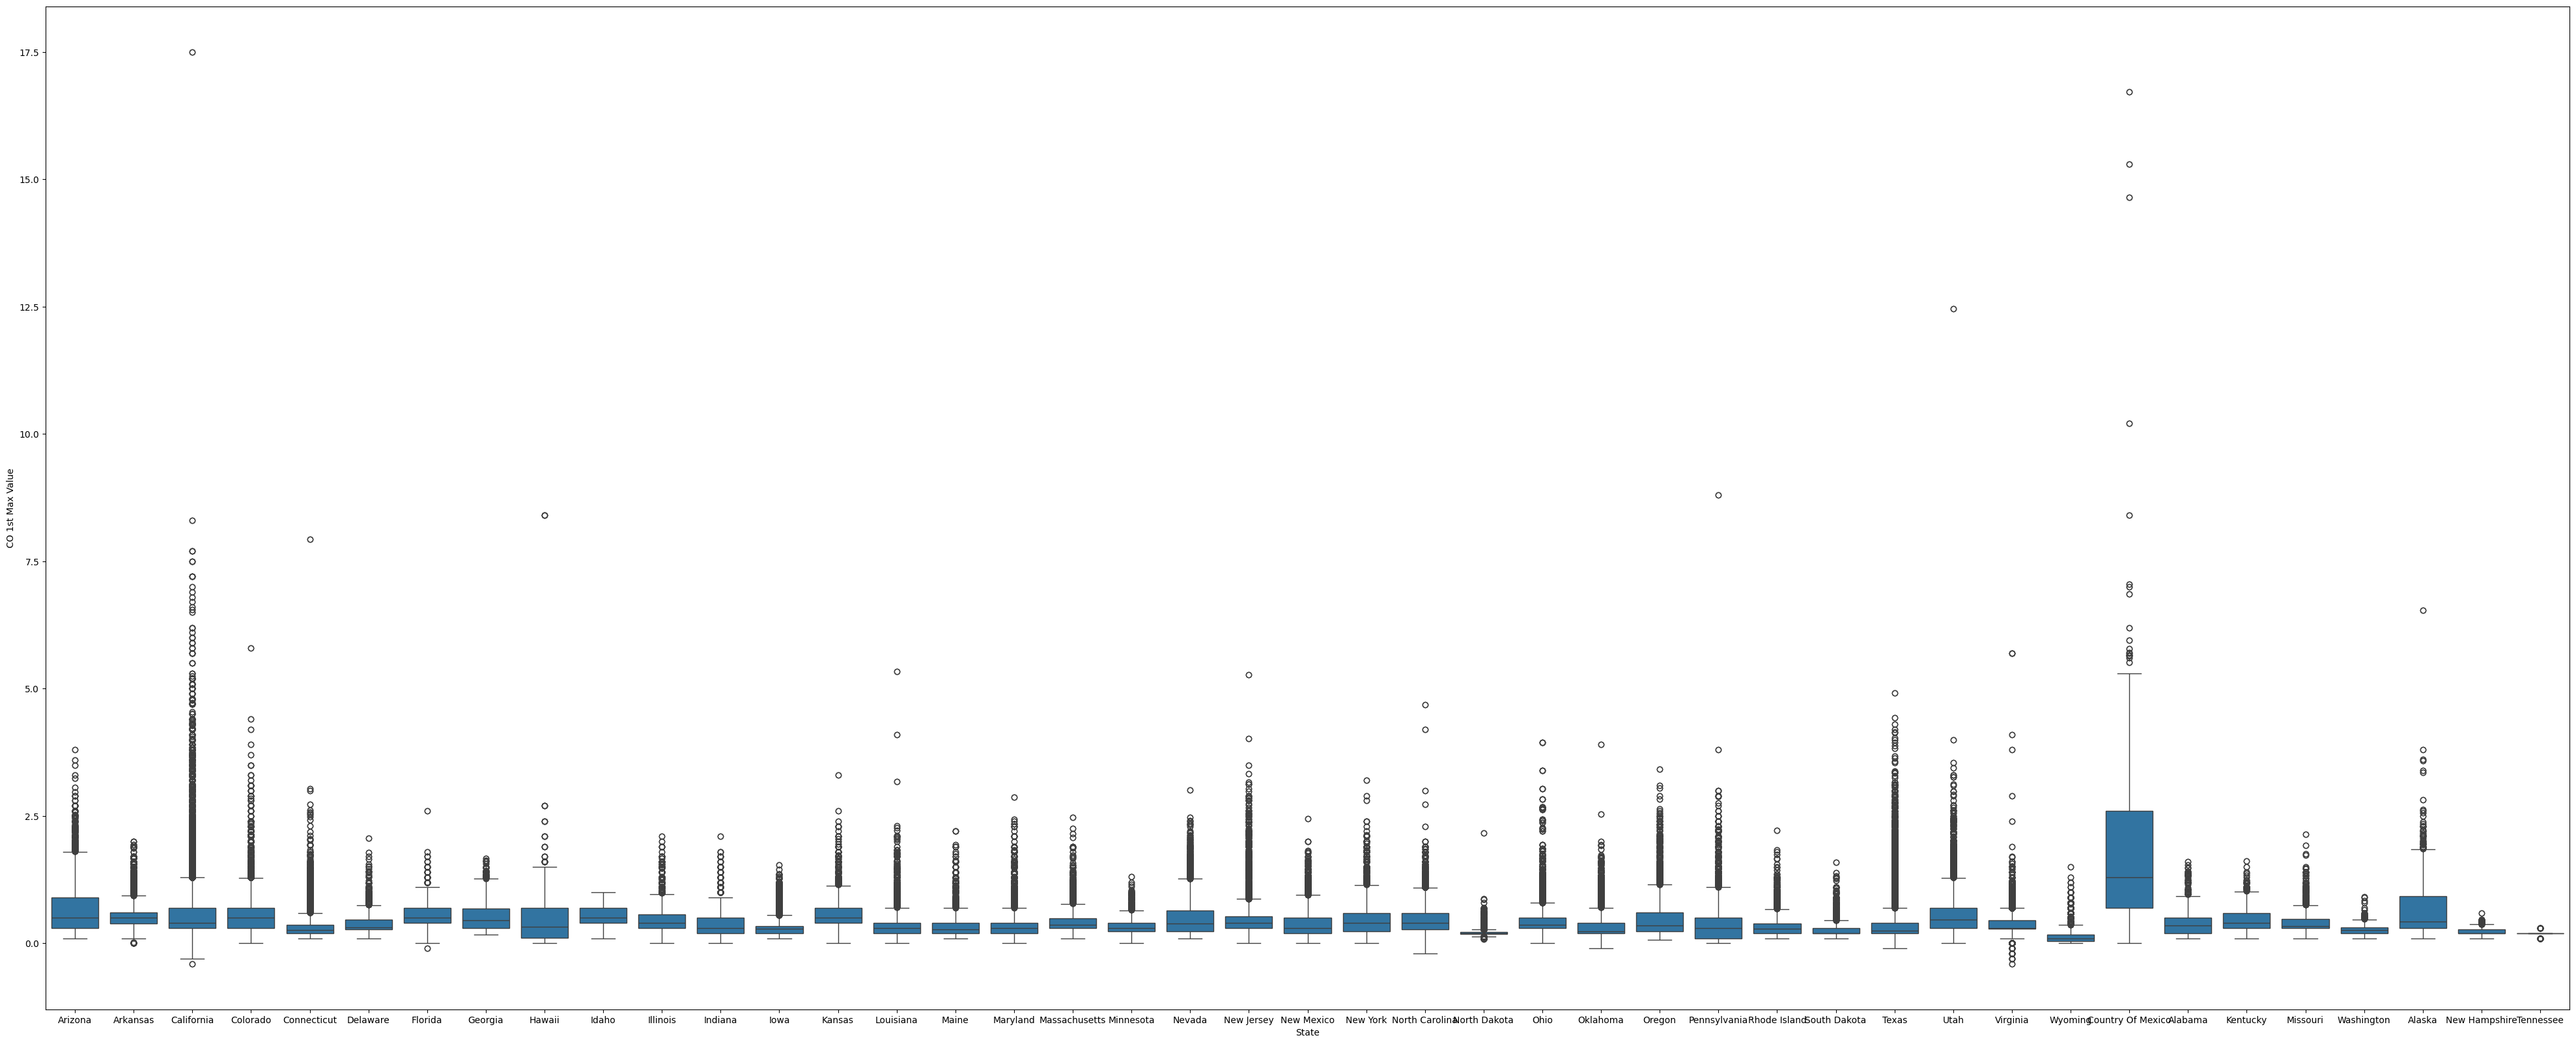

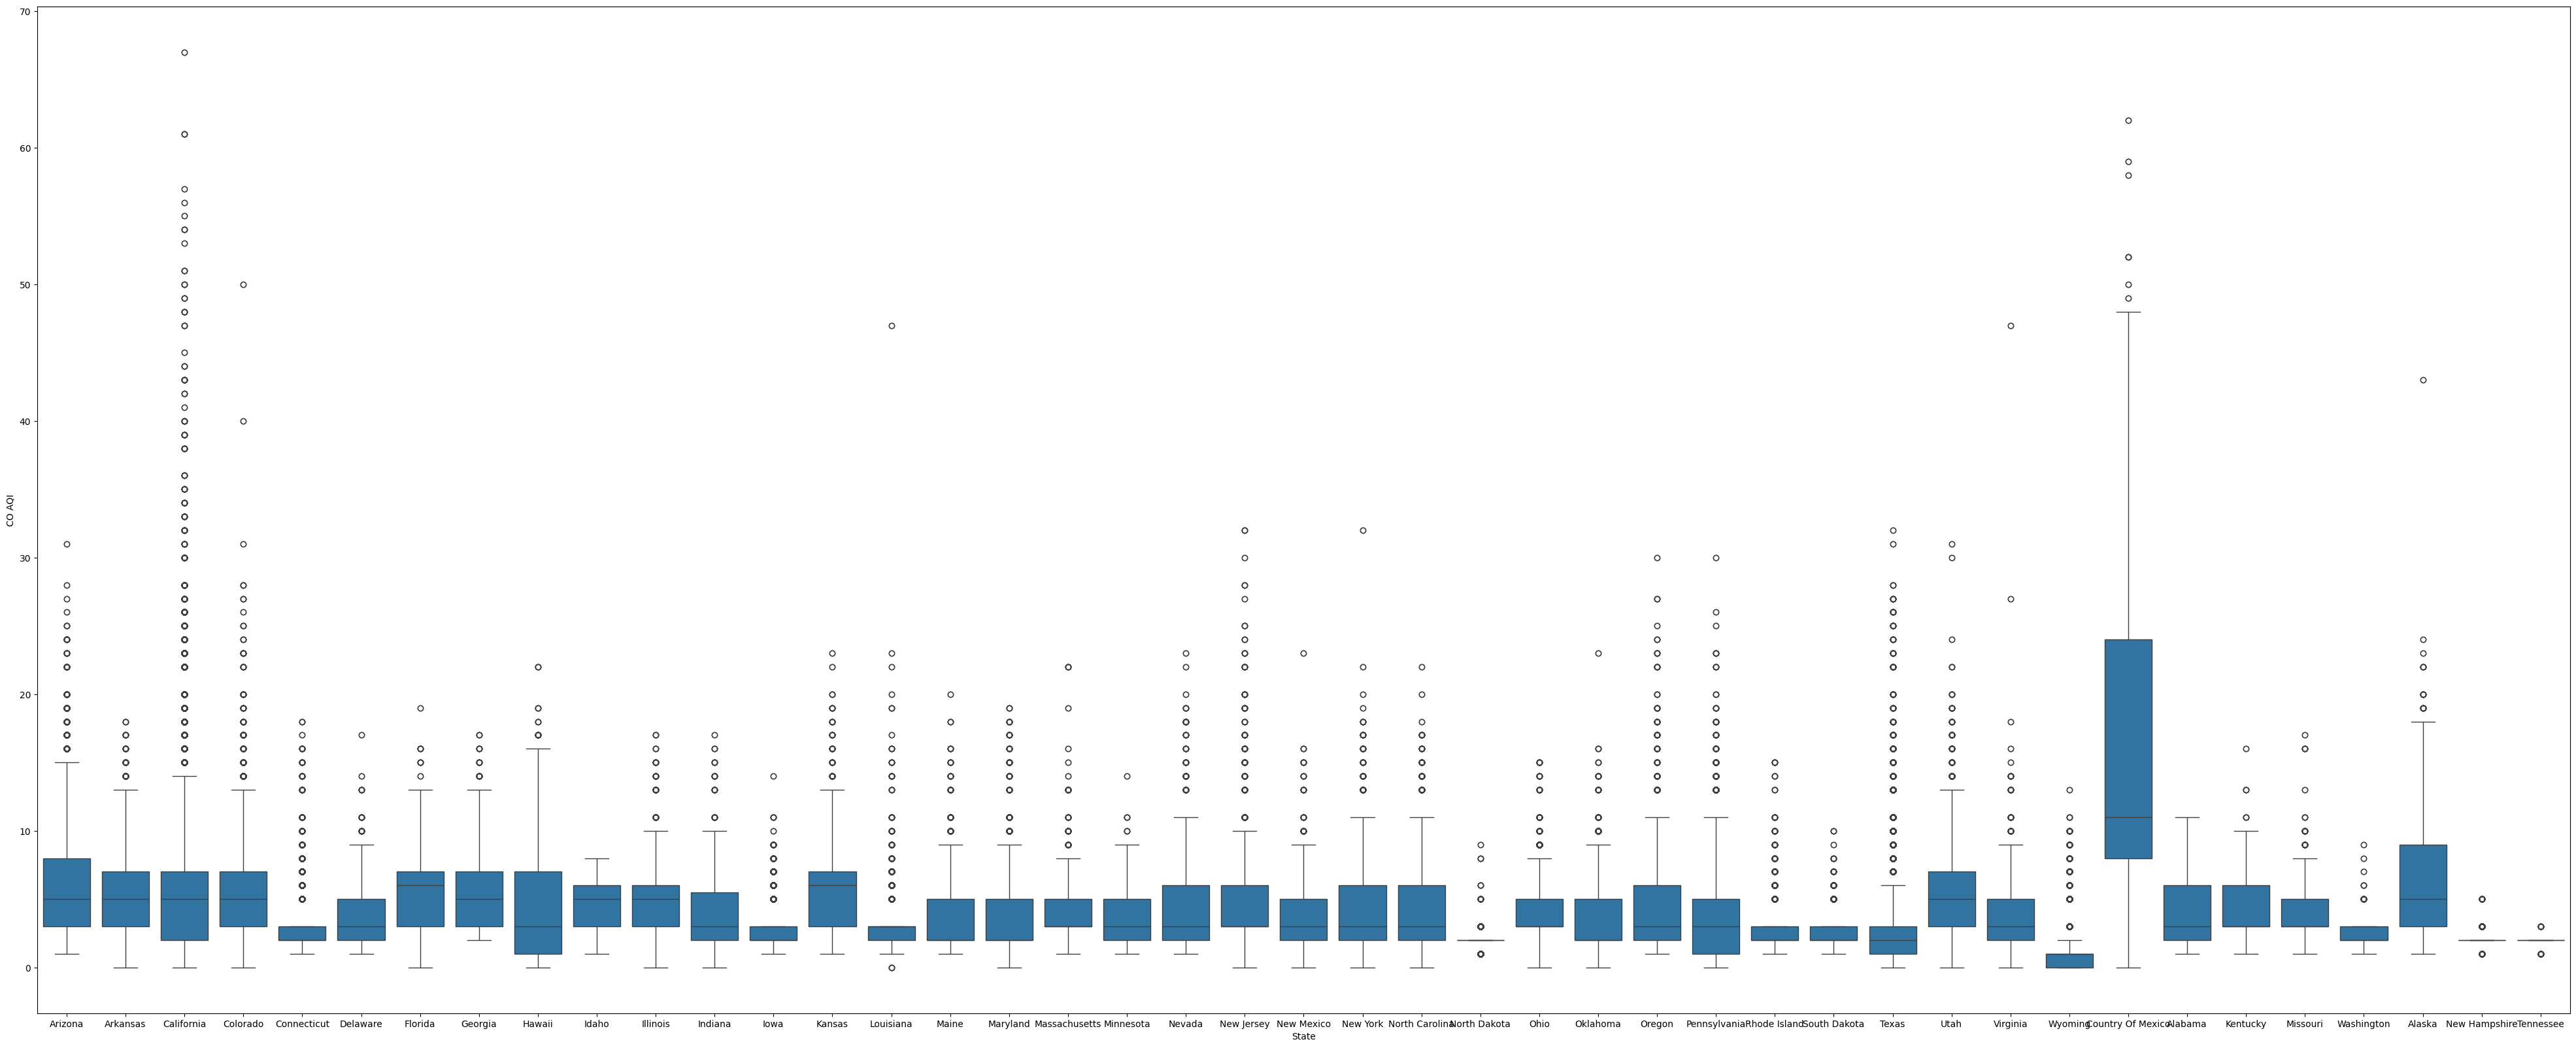

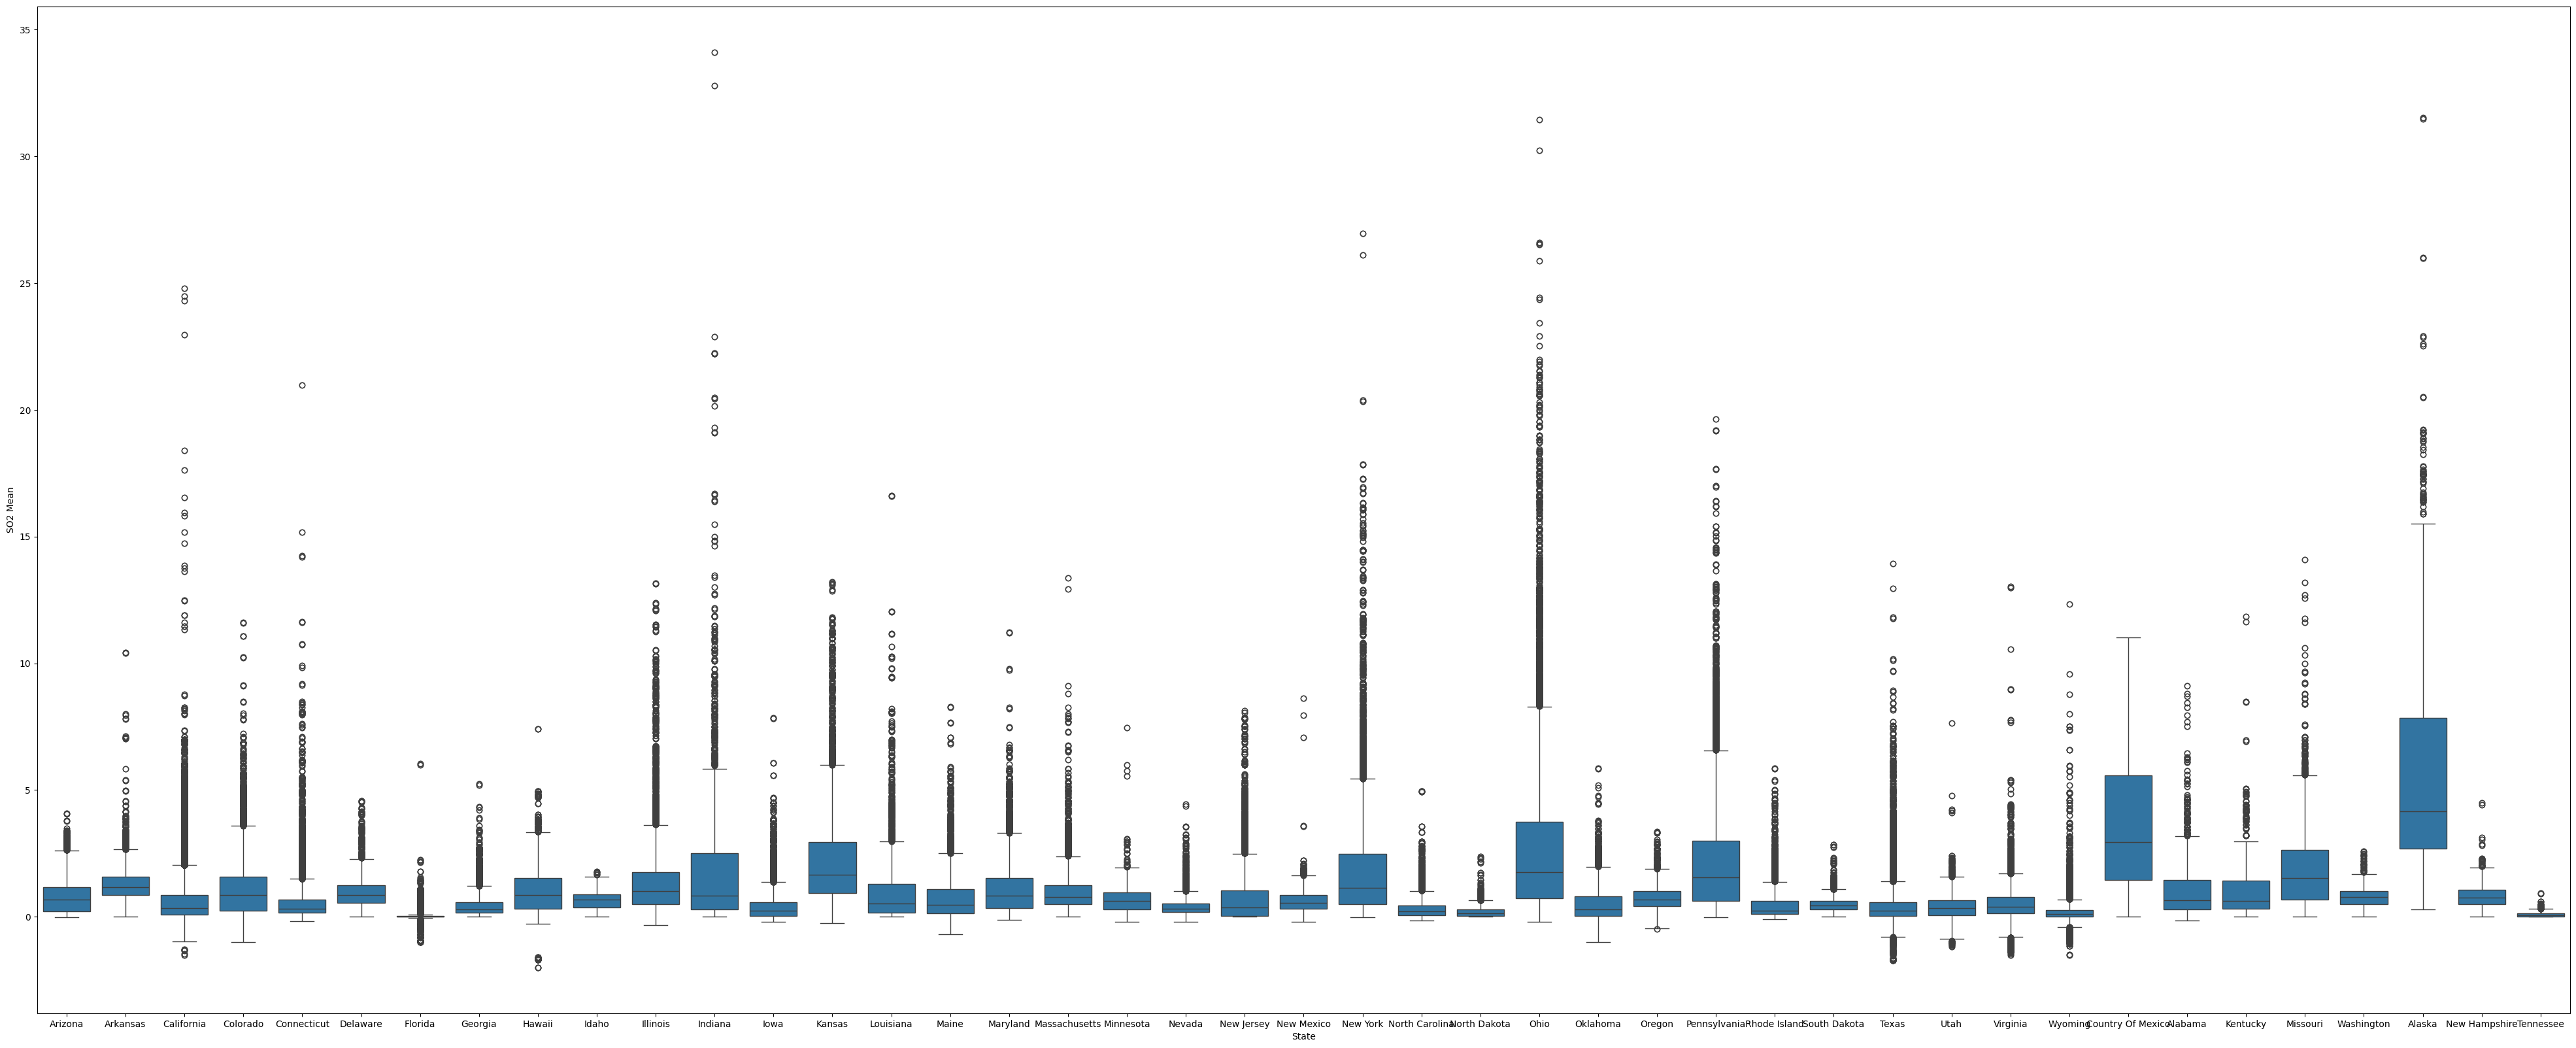

In [184]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

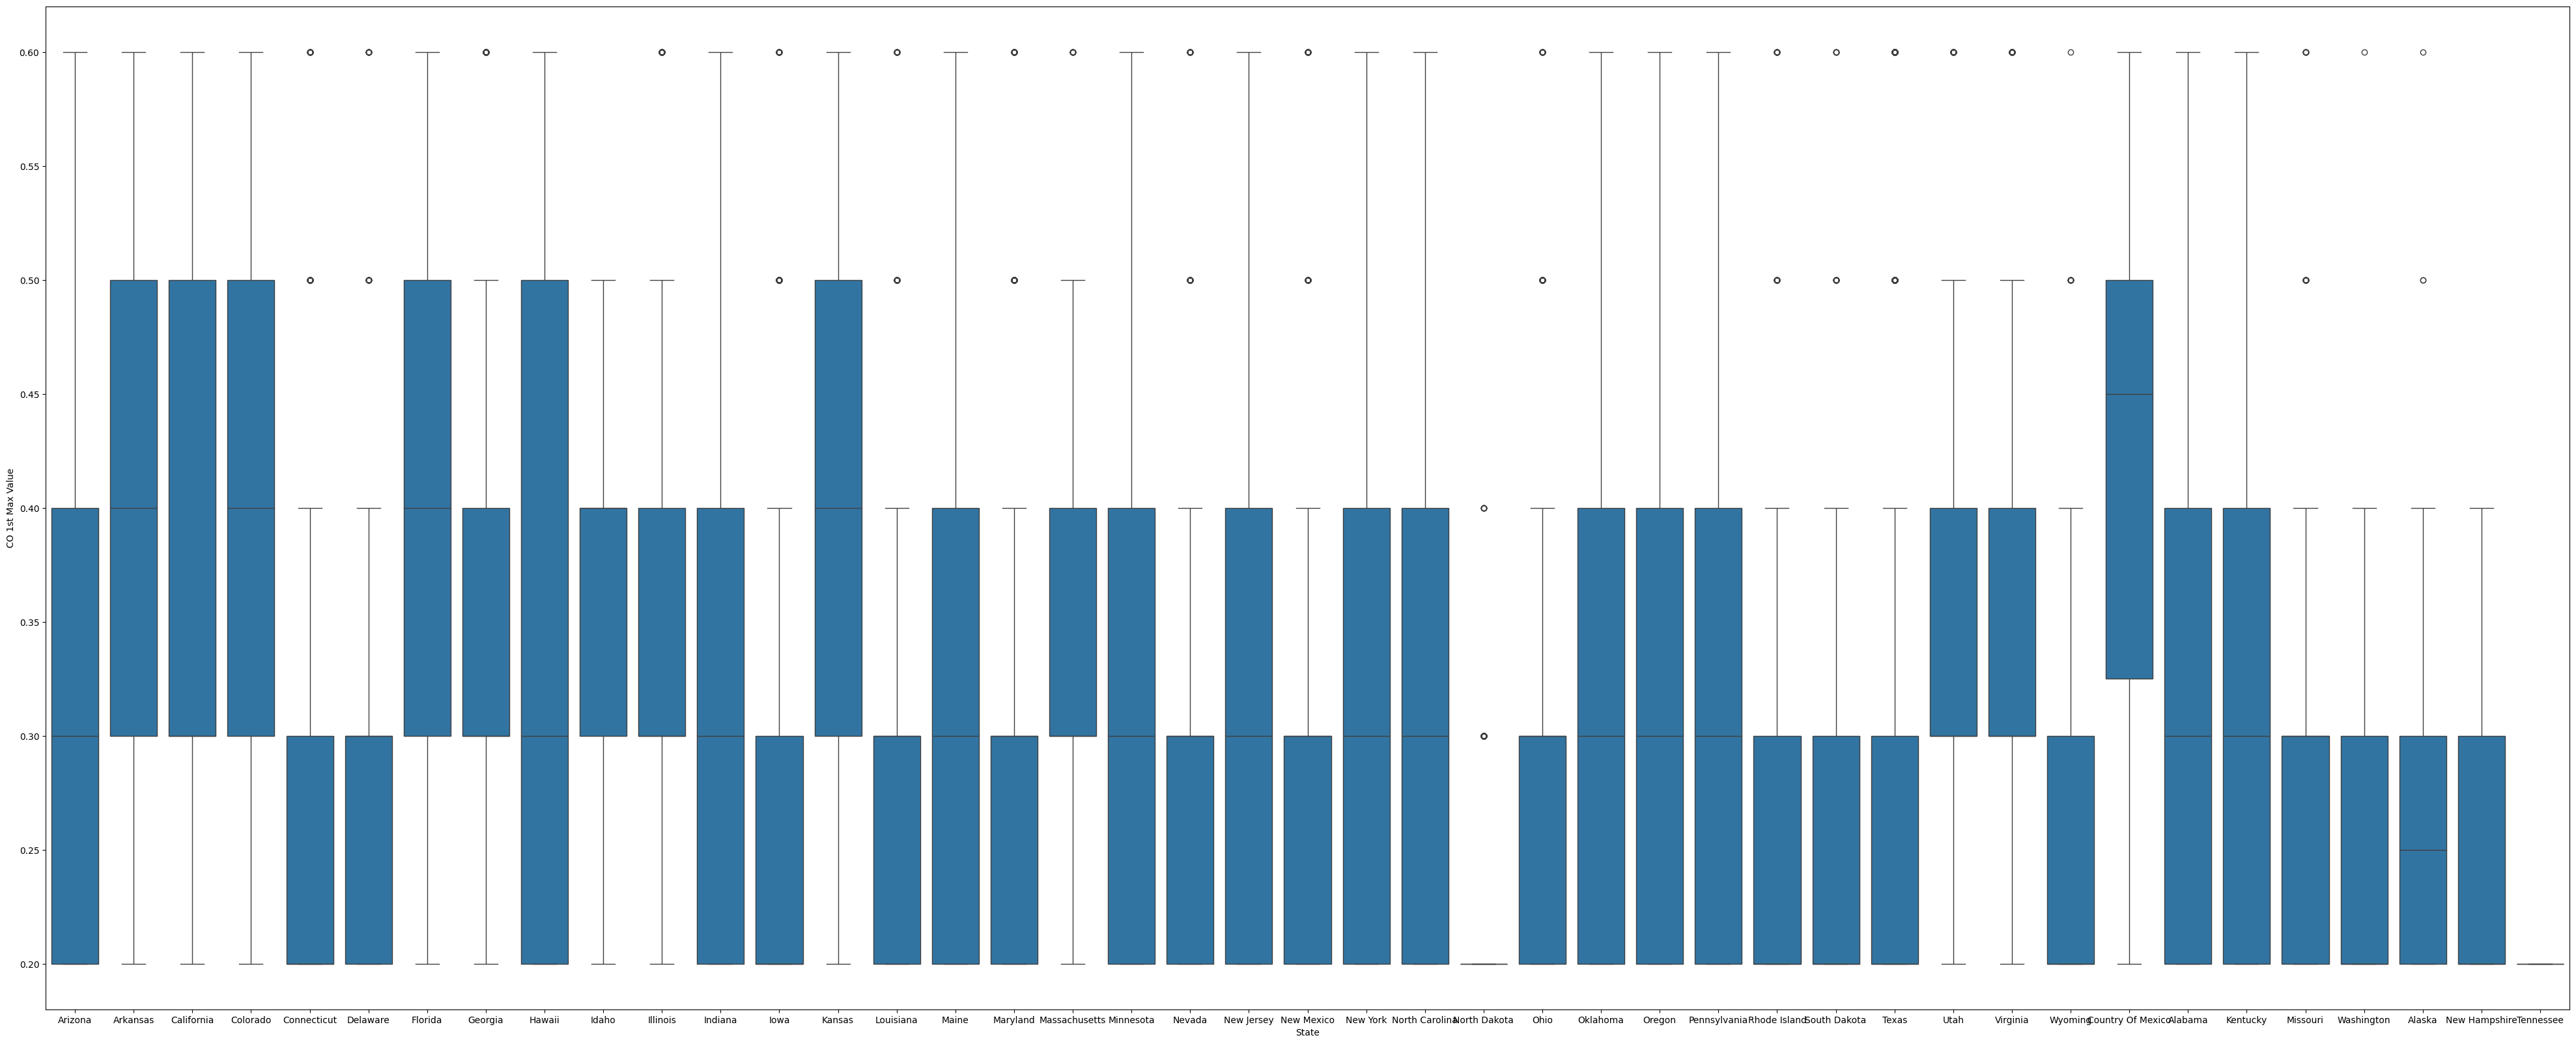

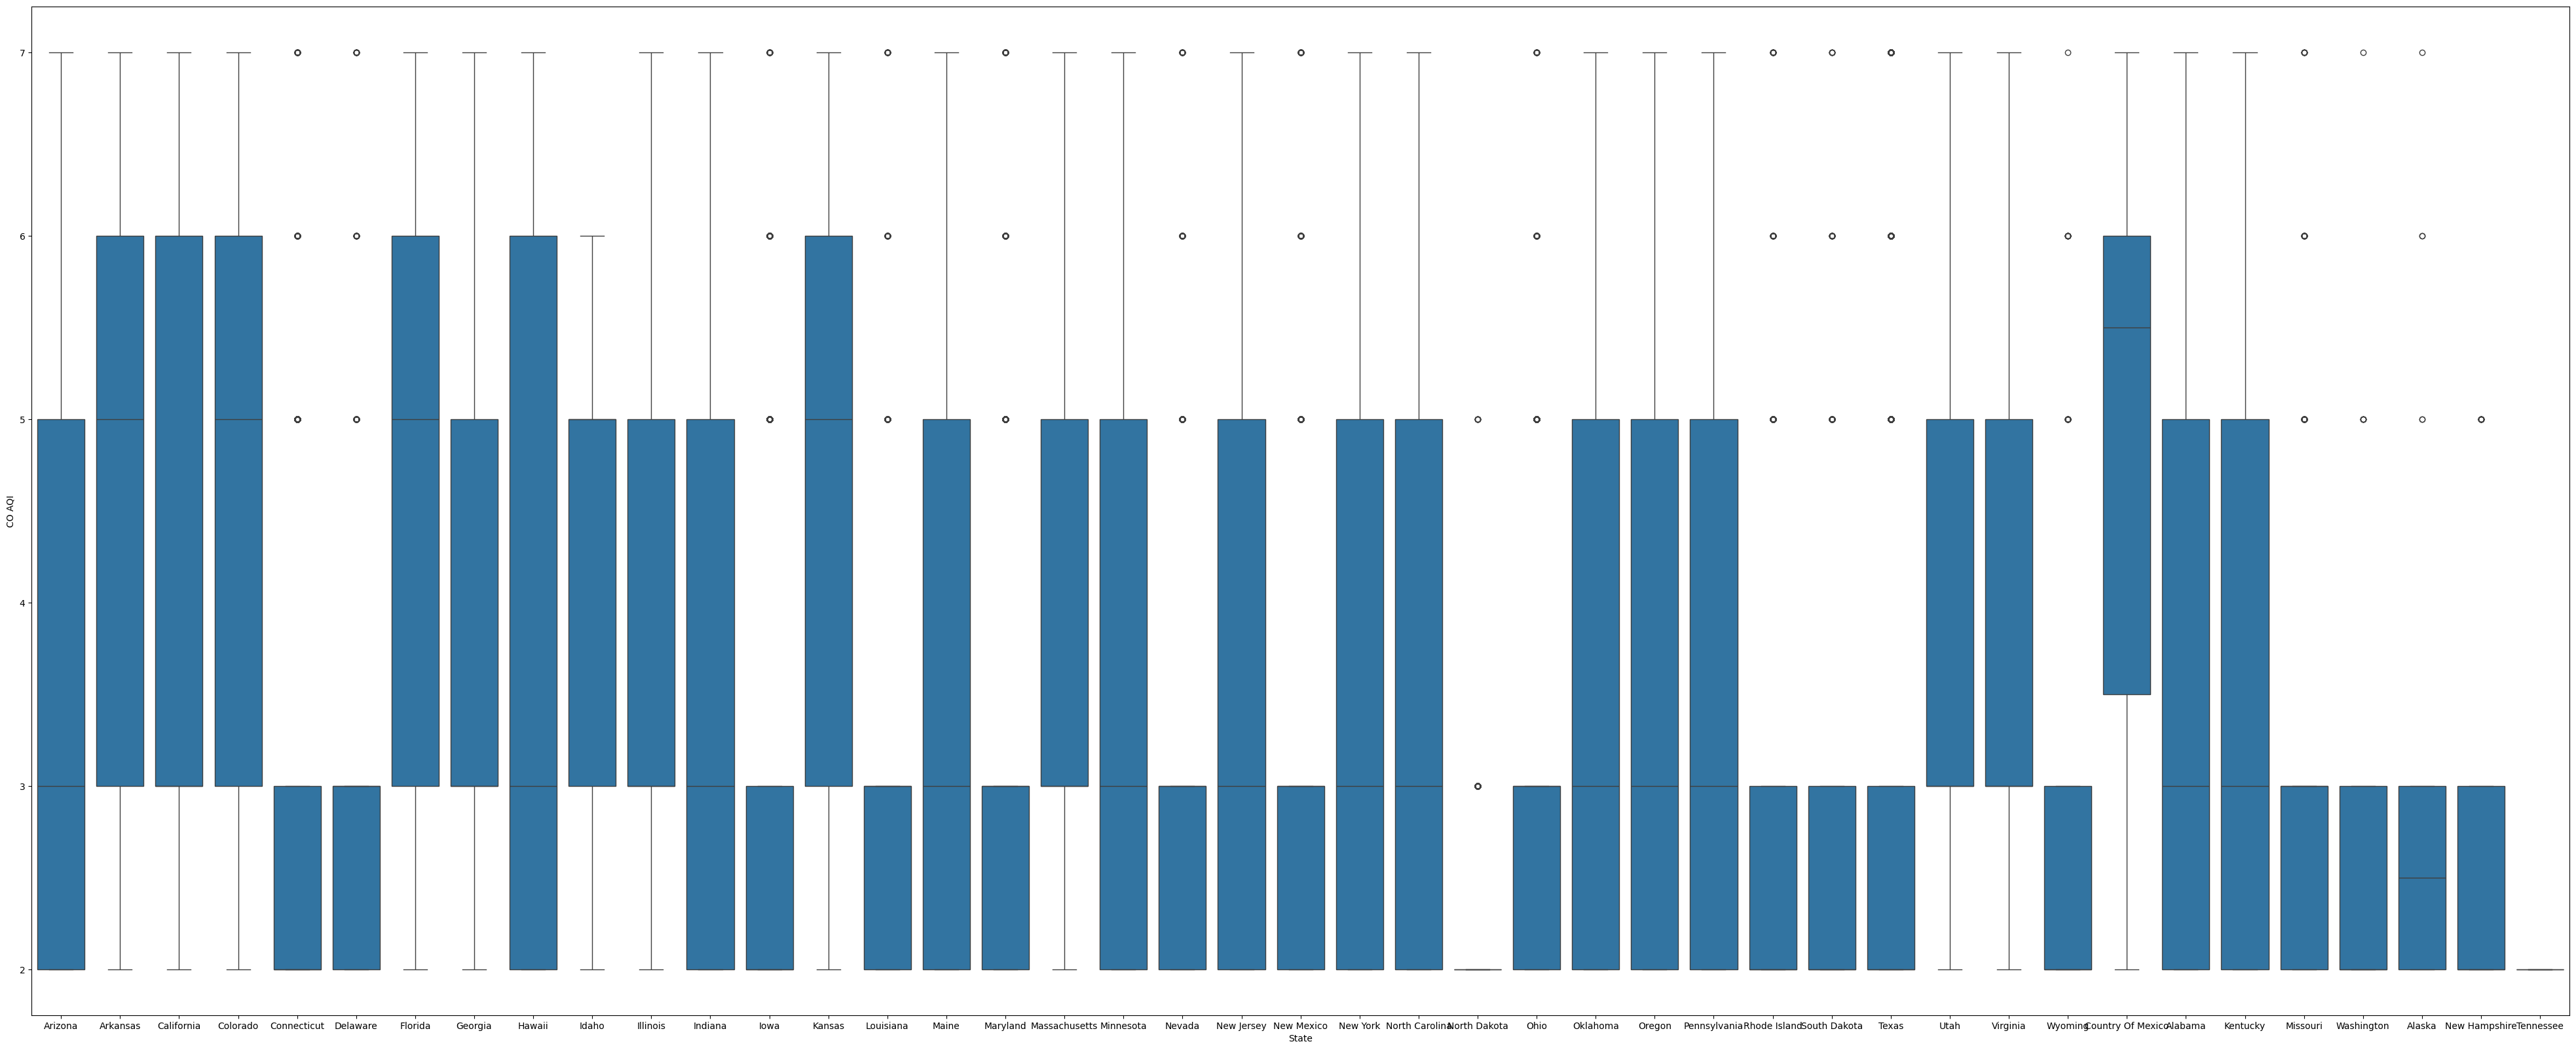

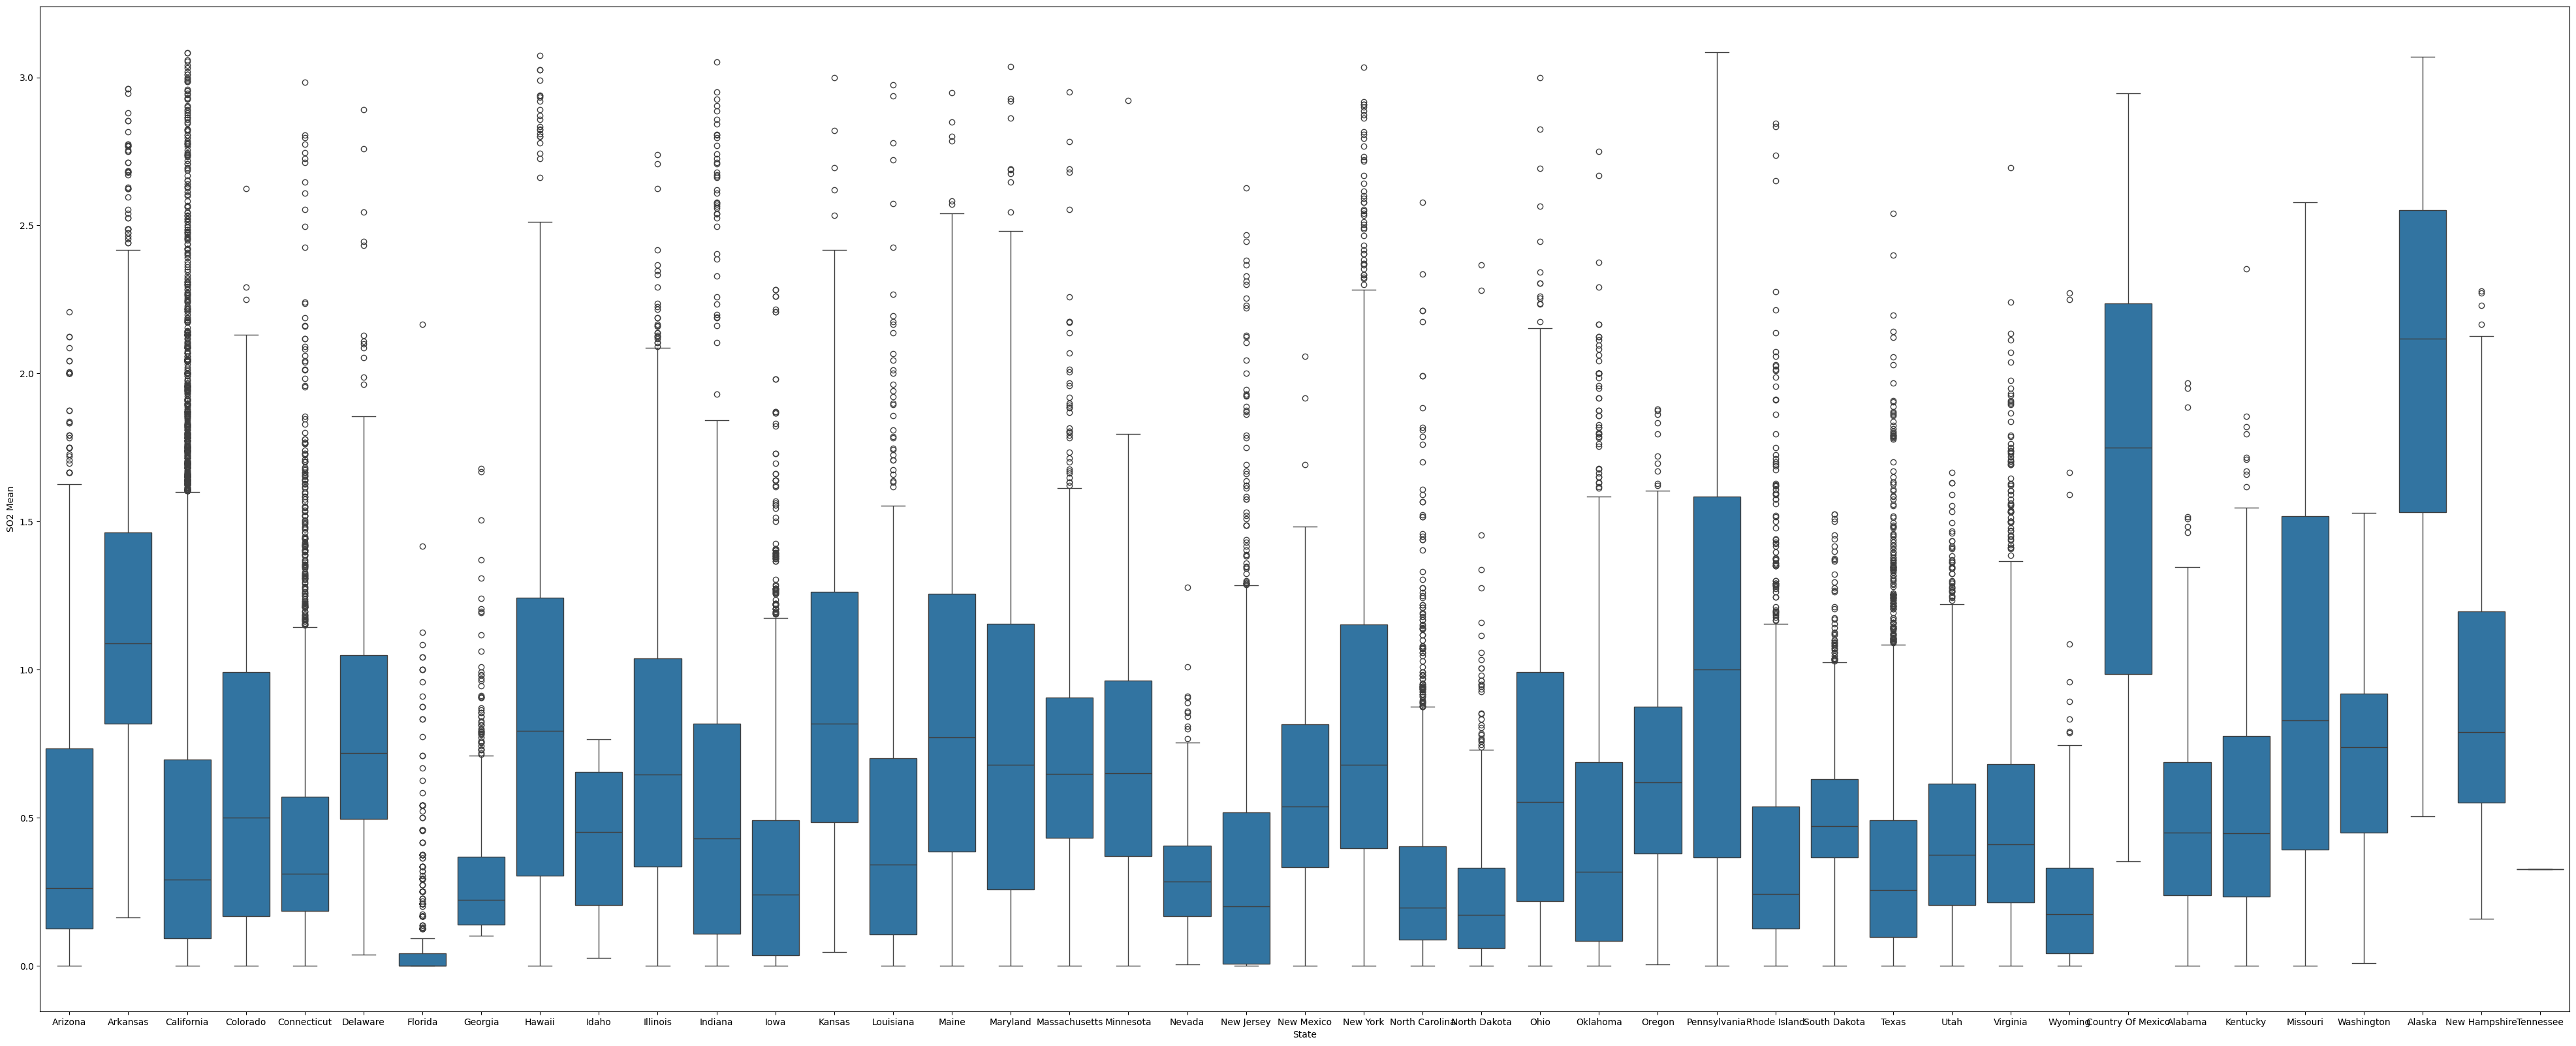

In [185]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()

## EDA

In [186]:
merged.describe()

,Year,Age_18-24,Age_20-24,Age_25-44,Age_35+,Age_45-64,Age_65+,Age_75+,Gender_Female,Gender_Male,...,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,1841.000000,595.000000,237.000000,1525.000000,1841.000000,1841.000000,1841.000000,1837.000000,1841.000000,1841.000000,...,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,2013.094514,50.696891,30.591139,30.223082,29.997067,29.651276,33.474552,32.995237,28.157116,29.380147,...,18.351205,0.026948,0.037887,33.670282,0.585771,1.427783,1.386746,0.236518,0.312453,3.433925
std,1.460635,35.070729,10.147617,29.823236,28.284387,28.660377,27.638753,26.119820,28.578956,29.000611,...,3.958563,0.003081,0.003393,2.972376,0.328144,0.567112,0.805643,0.048744,0.051964,0.702697
min,2011.000000,1.100000,4.900000,0.300000,2.400000,1.500000,4.200000,1.000000,1.600000,1.500000,...,7.000000,0.014166,0.023438,21.437500,0.022730,0.283019,0.000000,0.131982,0.200000,2.000000
25%,2012.000000,16.100000,32.350000,2.400000,6.800000,5.600000,11.400000,13.400000,4.000000,6.100000,...,15.488294,0.025398,0.035897,32.151316,0.334774,1.010096,0.732394,0.205212,0.279618,2.987261
50%,2013.000000,76.600000,34.100000,25.400000,15.000000,15.500000,21.900000,23.700000,11.700000,14.100000,...,18.273292,0.026975,0.038017,33.661290,0.521170,1.394595,1.255435,0.233333,0.310663,3.410959
75%,2014.000000,84.650000,35.400000,56.900000,63.000000,61.150000,65.700000,56.600000,57.550000,54.100000,...,20.982143,0.028721,0.039890,35.461153,0.790987,1.838217,2.054852,0.261664,0.342424,3.809365
max,2015.000000,93.000000,62.500000,91.200000,92.800000,92.000000,92.600000,93.700000,91.100000,93.800000,...,27.654206,0.041500,0.044716,41.000000,2.376164,3.793750,4.750000,0.409548,0.519608,6.117647


In [187]:
print(merged)

      Year LocationDesc                 Category  \
22    2011      Arizona  Cardiovascular Diseases   
23    2011      Arizona  Cardiovascular Diseases   
24    2011      Arizona  Cardiovascular Diseases   
25    2011      Arizona  Cardiovascular Diseases   
26    2011      Arizona             Risk Factors   
...    ...          ...                      ...   
2551  2015      Wyoming             Risk Factors   
2552  2015      Wyoming             Risk Factors   
2553  2015      Wyoming             Risk Factors   
2554  2015      Wyoming             Risk Factors   
2555  2015      Wyoming             Risk Factors   

                                           Topic  Age_18-24  Age_20-24  \
22    Acute Myocardial Infarction (Heart Attack)        NaN        NaN   
23                        Coronary Heart Disease        NaN        NaN   
24                  Major Cardiovascular Disease        NaN        NaN   
25                                        Stroke        NaN        NaN   
26   

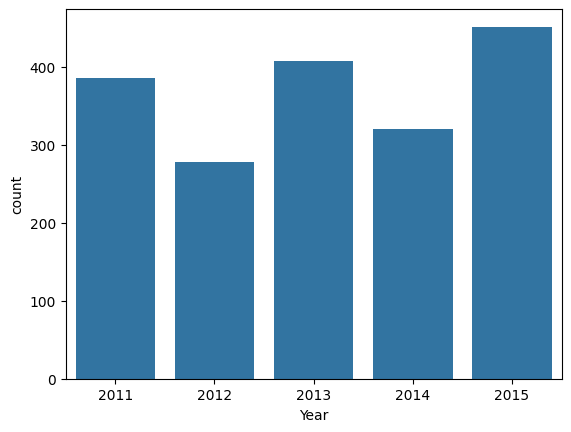

In [188]:
sns.countplot(x="Year", data = merged)
plt.show()

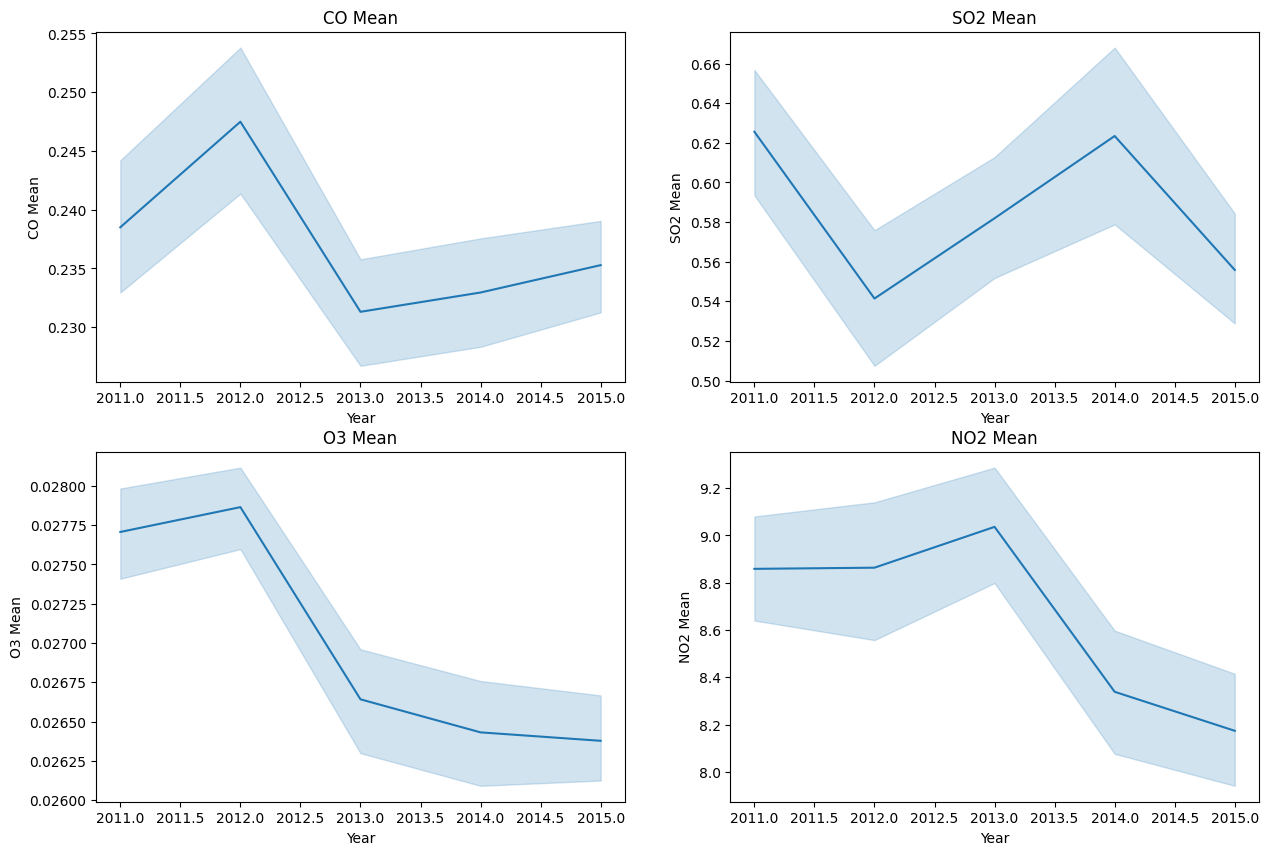

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot CO Mean
sns.lineplot(x="Year", y="CO Mean", data=merged, ax=axes[0, 0])
axes[0, 0].set_title("CO Mean")

# Plot SO2 Mean
sns.lineplot(x="Year", y="SO2 Mean", data=merged, ax=axes[0, 1])
axes[0, 1].set_title("SO2 Mean")

# Plot O3 Mean
sns.lineplot(x="Year", y="O3 Mean", data=merged, ax=axes[1, 0])
axes[1, 0].set_title("O3 Mean")

# Plot NO2 Mean
sns.lineplot(x="Year", y="NO2 Mean", data=merged, ax=axes[1, 1])
axes[1, 1].set_title("NO2 Mean")

plt.show()


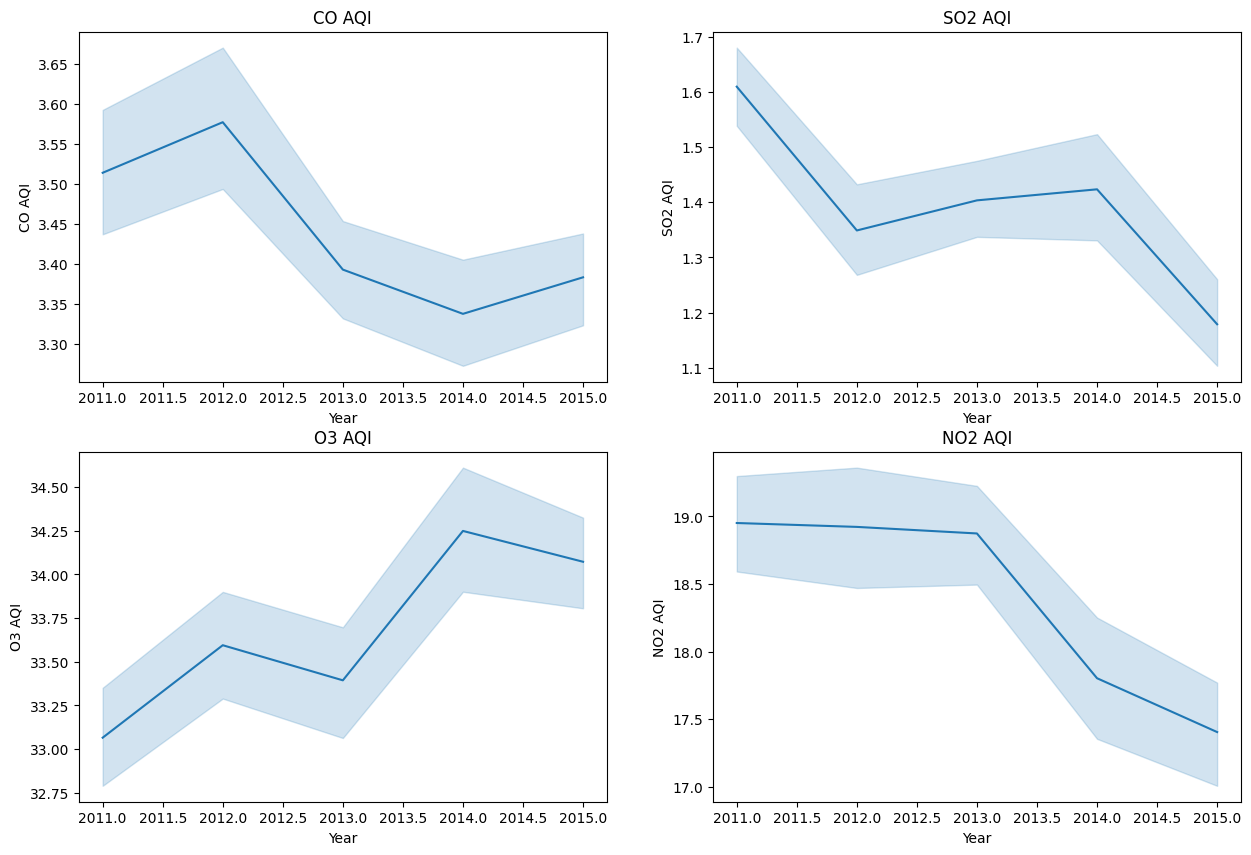

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot CO AQI
sns.lineplot(x="Year", y="CO AQI", data=merged, ax=axes[0, 0])
axes[0, 0].set_title("CO AQI")

# Plot SO2 AQI
sns.lineplot(x="Year", y="SO2 AQI", data=merged, ax=axes[0, 1])
axes[0, 1].set_title("SO2 AQI")

# Plot O3 AQI
sns.lineplot(x="Year", y="O3 AQI", data=merged, ax=axes[1, 0])
axes[1, 0].set_title("O3 AQI")

# Plot NO2 AQI
sns.lineplot(x="Year", y="NO2 AQI", data=merged, ax=axes[1, 1])
axes[1, 1].set_title("NO2 AQI")

plt.show()


In [191]:
# Aggregating the data by Year and calculating the average for each pollutant
pollutant_mean_trends = merged.groupby('Year')[['CO Mean', 'SO2 Mean', 'O3 Mean', 'NO2 Mean']].mean().reset_index()

# Displaying the first few rows of the result
print(pollutant_mean_trends.head())


   Year   CO Mean  SO2 Mean   O3 Mean  NO2 Mean
0  2011  0.238504  0.625598  0.027707  8.858775
1  2012  0.247489  0.541406  0.027865  8.863702
2  2013  0.231313  0.581936  0.026641  9.036451
3  2014  0.232956  0.623452  0.026431  8.338526
4  2015  0.235285  0.555844  0.026377  8.173502


In [192]:
#Load all needed modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Slope: -0.1895723133108948 | Intercept: 390.2632577096096
Mean Squared Error (MSE): 0.040640449575650245
R-squared (R²): 0.6388022025456153


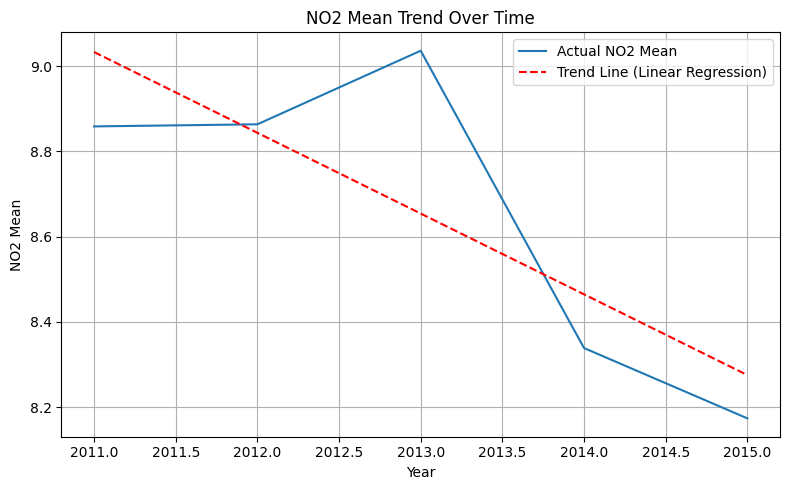

In [193]:
X = pollutant_mean_trends['Year'].values.reshape(-1, 1)  # Years
y = pollutant_mean_trends['NO2 Mean'].values           # Target variable

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]} | Intercept: {model.intercept_}")

# Predict y values using the model (for plotting)
y_pred = model.predict(X)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# R-squared
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='Actual NO2 Mean')       # actual data
plt.plot(X, y_pred, 'r--', label='Trend Line (Linear Regression)')  # regression line
plt.title('NO2 Mean Trend Over Time')
plt.xlabel('Year')
plt.ylabel('NO2 Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Slope: -0.0020972305534285333 | Intercept: 4.458834604455411
Mean Squared Error (MSE): 2.3977289956890896e-05
R-squared (R²): 0.2684060758552407


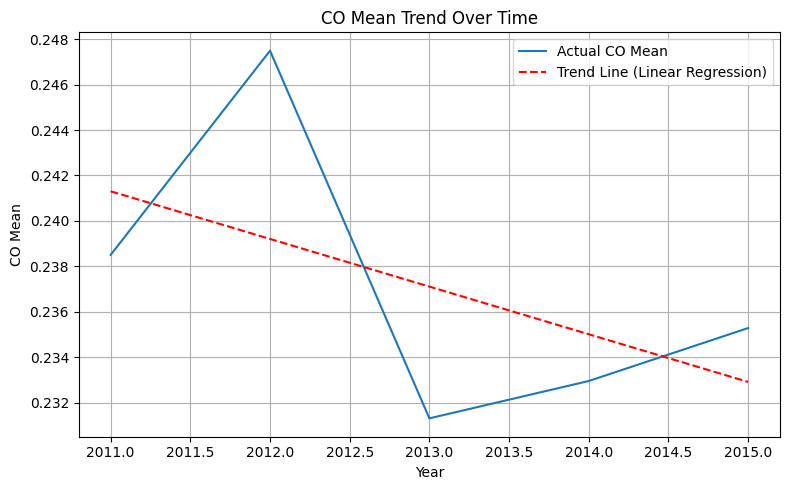

In [194]:
y = pollutant_mean_trends['CO Mean'].values           # Target variable

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]} | Intercept: {model.intercept_}")

# Predict y values using the model (for plotting)
y_pred = model.predict(X)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# R-squared
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='Actual CO Mean')       # actual data
plt.plot(X, y_pred, 'r--', label='Trend Line (Linear Regression)')  # regression line
plt.title('CO Mean Trend Over Time')
plt.xlabel('Year')
plt.ylabel('CO Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Slope: -0.005746243207755666 | Intercept: 12.15283492083739
Mean Squared Error (MSE): 0.001110869574651929
R-squared (R²): 0.056111956899390636


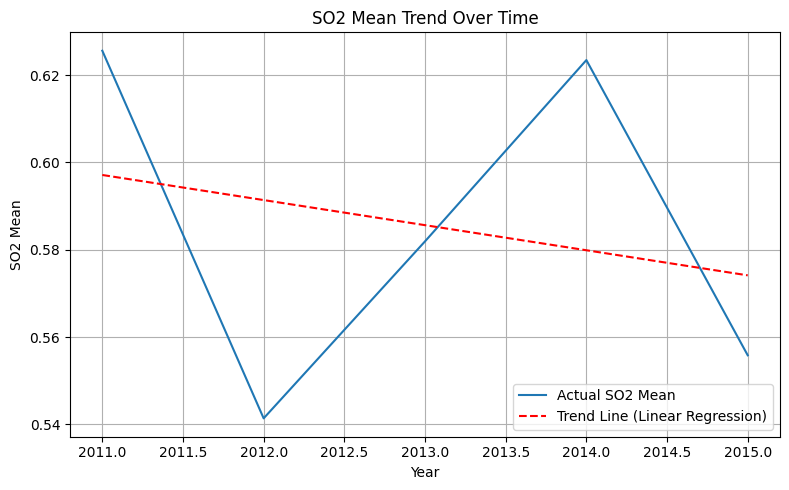

In [195]:
y = pollutant_mean_trends['SO2 Mean'].values           # Target variable

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]} | Intercept: {model.intercept_}")

# Predict y values using the model (for plotting)
y_pred = model.predict(X)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# R-squared
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='Actual SO2 Mean')       # actual data
plt.plot(X, y_pred, 'r--', label='Trend Line (Linear Regression)')  # regression line
plt.title('SO2 Mean Trend Over Time')
plt.xlabel('Year')
plt.ylabel('SO2 Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Slope: -0.00040943241803687095 | Intercept: 0.8511918117405515
Mean Squared Error (MSE): 8.255071292950233e-08
R-squared (R²): 0.8024254233023131


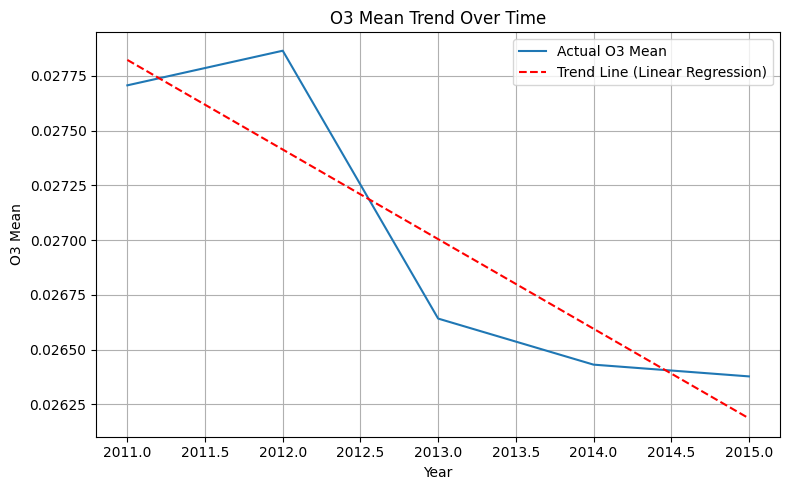

In [196]:
y = pollutant_mean_trends['O3 Mean'].values           # Target variable

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]} | Intercept: {model.intercept_}")

# Predict y values using the model (for plotting)
y_pred = model.predict(X)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)

# R-squared
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='Actual O3 Mean')       # actual data
plt.plot(X, y_pred, 'r--', label='Trend Line (Linear Regression)')  # regression line
plt.title('O3 Mean Trend Over Time')
plt.xlabel('Year')
plt.ylabel('O3 Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()